In [17]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\allep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## IMPORT

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

## Define path and check head

In [19]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head()  # Check the first few rows of the dataset
file_path = 'Sales Transaction v.4a.csv'  # Use the correct file path here
df_cleaned = pd.read_csv(file_path)

# Preprocessing
### Converting ProductNo with label encoder
### Dropping irrelevant columns
### Choose the predict target, in our case we chose to predict price

In [20]:
le = LabelEncoder()
df_cleaned['ProductNo'] = le.fit_transform(df_cleaned['ProductNo'])

if 'Country' in df_cleaned.columns:
    X = df_cleaned.drop(columns=['Price', 'Date', 'Country', 'CustomerNo', 'TransactionNo', 'ProductName'])
else:
    X = df_cleaned.drop(columns=['Price', 'Date', 'CustomerNo', 'TransactionNo', 'ProductName'])

y = df_cleaned['Price']


# Split data 
## Training set and testing set

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build and train the Linear Regression model

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
lin_mape = mean_absolute_percentage_error(y_test, y_pred_lin)


## Build and train the Decision Tree Regressor

In [23]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
tree_mape = mean_absolute_percentage_error(y_test, y_pred_tree)

## Build and train the Random Forest Regressor

In [24]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
forest_mape = mean_absolute_percentage_error(y_test, y_pred_forest)

## Print the MAPE values for each model

In [25]:
print(f"MAPE for Linear Regression: {lin_mape}")
print(f"MAPE for Decision Tree: {tree_mape}")
print(f"MAPE for Random Forest: {forest_mape}")

MAPE for Linear Regression: 0.2651303191301836
MAPE for Decision Tree: 0.13674546893825196
MAPE for Random Forest: 0.13666687809223035


## Visualize the MAPE for each model (Bar Chart)

C:\Users\allep\AppData\Local\Temp\ipykernel_29512\3242202946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mape_values, palette='viridis')


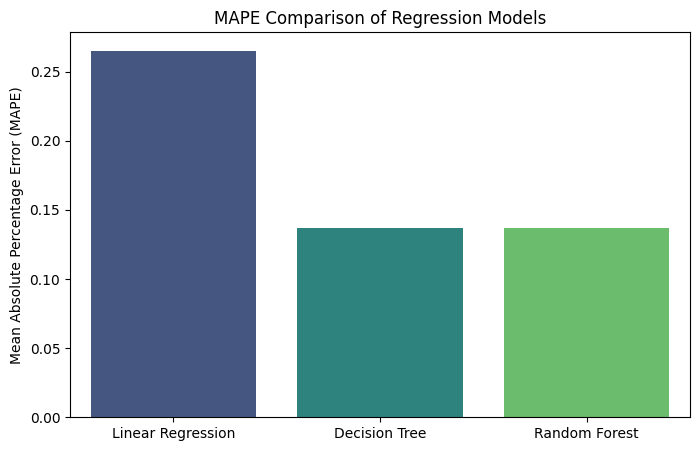

In [26]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mape_values = [lin_mape, tree_mape, forest_mape]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=mape_values, palette='viridis')
plt.title("MAPE Comparison of Regression Models")
plt.ylabel("Mean Absolute Percentage Error (MAPE)")
plt.show()

# Plots
## Plot Predicted vs Actual Values (Scatter Plot)
### Scatter plot for Linear Regression
### Scatter plot for Decision Tree
### Scatter plot for Random Forrest

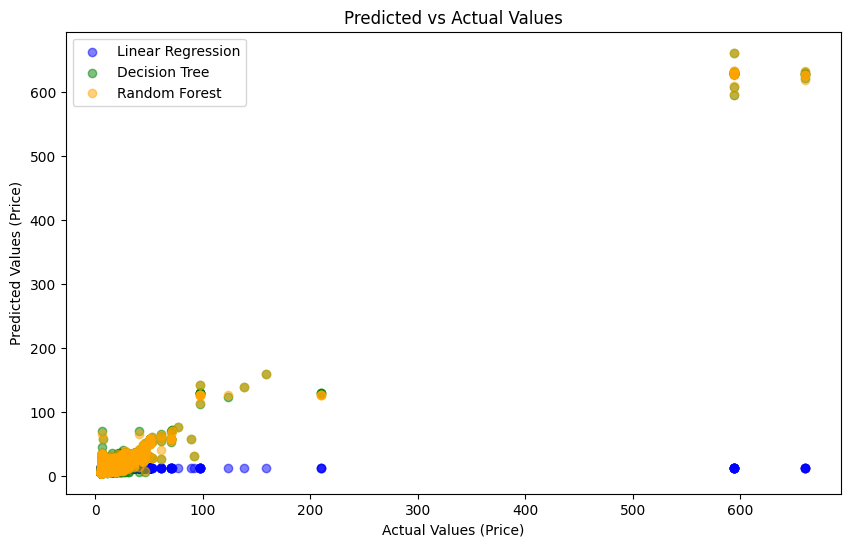

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_lin, label="Linear Regression", alpha=0.5, color='blue')

plt.scatter(y_test, y_pred_tree, label="Decision Tree", alpha=0.5, color='green')

plt.scatter(y_test, y_pred_forest, label="Random Forest", alpha=0.5, color='orange')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.legend()
plt.show()

##  Visualize the feature importance for Linear Regression

C:\Users\allep\AppData\Local\Temp\ipykernel_29512\1600484298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=lin_coef, palette='viridis')


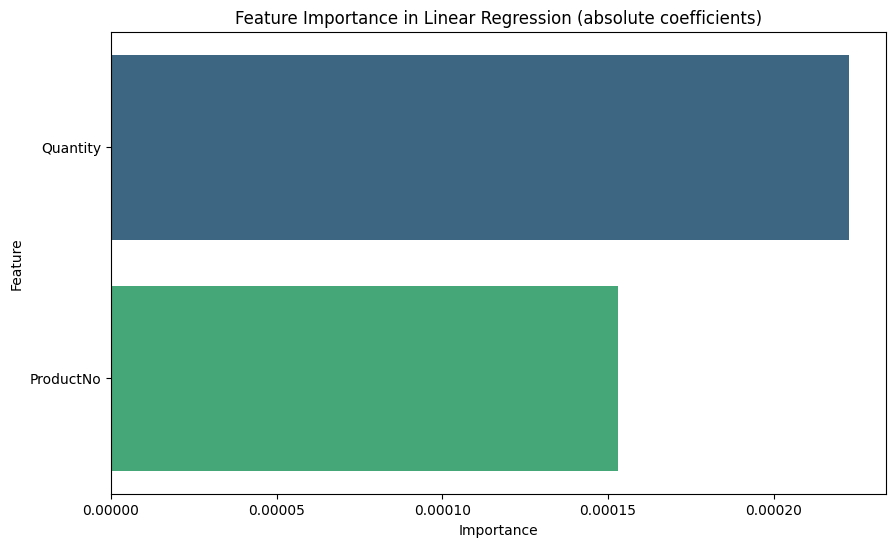

In [28]:
lin_coef = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lin_reg.coef_)}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lin_coef, palette='viridis')
plt.title("Feature Importance in Linear Regression (absolute coefficients)")
plt.show()


## Visualize the feature importance for Decision Tree

C:\Users\allep\AppData\Local\Temp\ipykernel_29512\1315944226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='viridis')


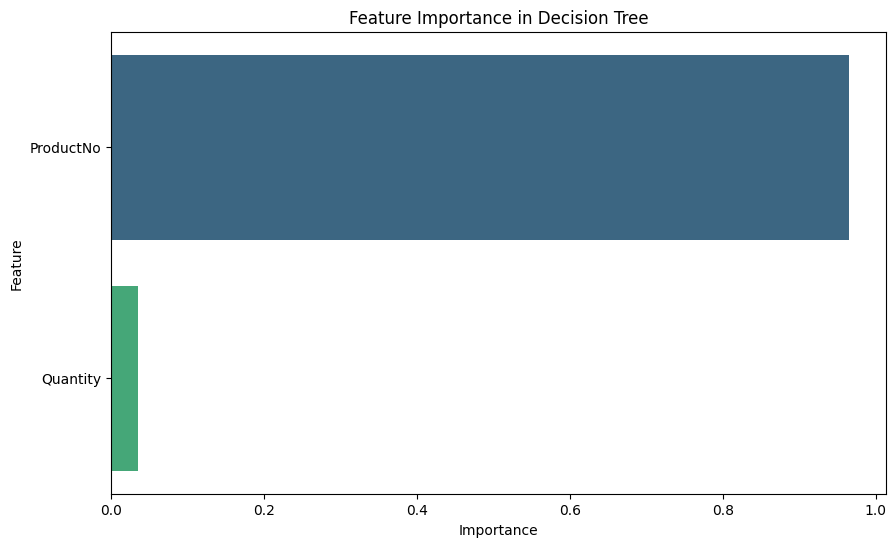

In [29]:
tree_importances = pd.DataFrame({'Feature': X.columns, 'Importance': tree_reg.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=tree_importances, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.show()


## Visualize the feature importance for Random Forest

C:\Users\allep\AppData\Local\Temp\ipykernel_29512\4136842228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=forest_importances, palette='viridis')


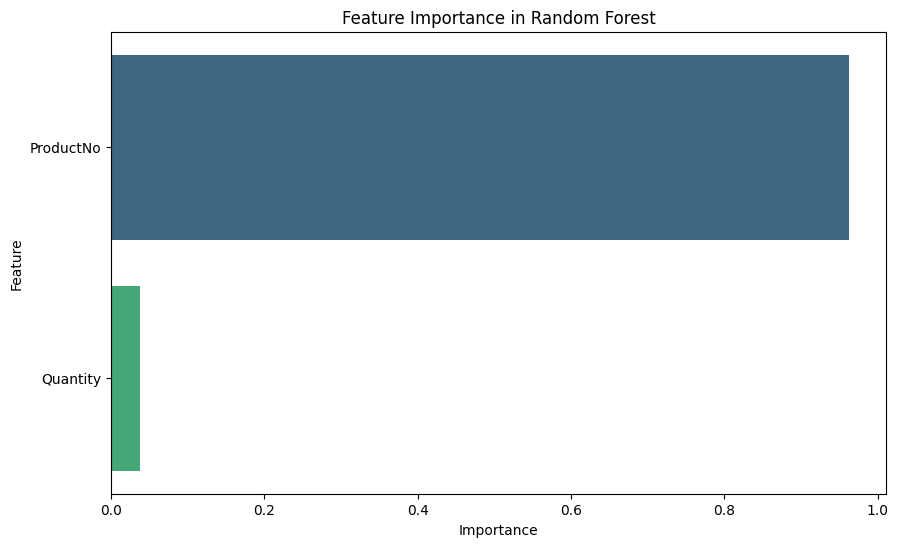

In [30]:
forest_importances = pd.DataFrame({'Feature': X.columns, 'Importance': forest_reg.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=forest_importances, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.show()

# Feature importance
### In the Linear Regression model the importance of Quantity is greater than the importance of the product number. The difference between the amount of importance is not that far aport of eachother compared to the Random Forest and Descision Tree models. In theese two models the importance of productnumber is far greater than the importance of quantity

### Meaning that the importance and predicitve vaulue depens on the ML models preformed.

# Ranking ML Models

### The Random Forest model has the lowest MAPE (slightly better than the Decision Tree)
### Decision Trees also performed very well, almost as well as Random Forest. The MAPE is nearly identical to that of the Random Forest model
###  Linear Regression’s MAPE is significantly higher (~26.5%), indicating that it is not a good fit for this dataset. It’s likely that the relationships between the features and the target variable are non-linear, which Linear Regression cannot capture effectively.

# Conclussion

### Random Forest model is the best fit

## Check datatypes

In [31]:
print(df.dtypes)
print(df.isnull().sum())
df.describe()
numeric_df = df.select_dtypes(include=['float64', 'int64'])

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64


## Investigate correlations between features

In [32]:
corr = numeric_df.corr()

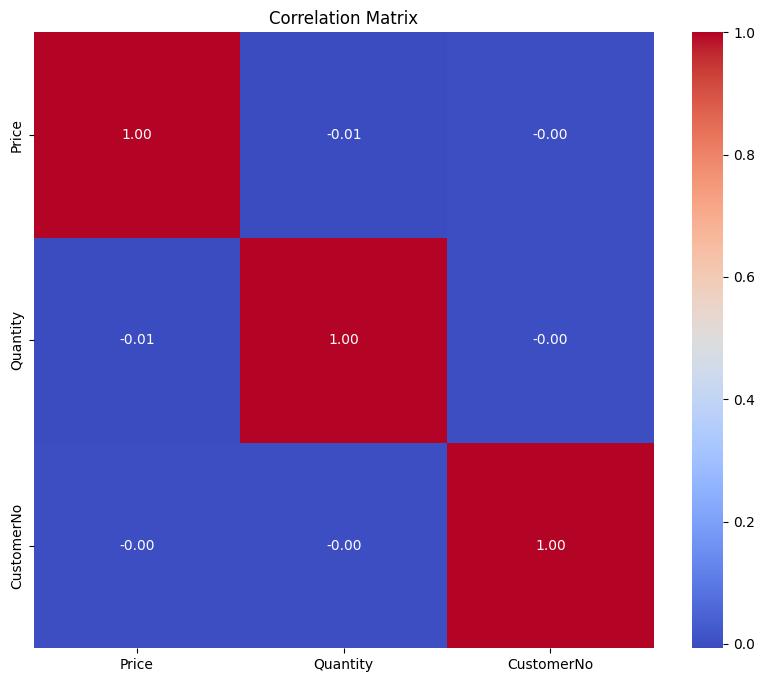

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()